# Plots

This notebook makes some interesting plots.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from joblib import Parallel, delayed
import multiprocessing
import time
from tqdm import tqdm
from scipy.interpolate import griddata
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/')
from functions_simpler import *

In [2]:
# The total H and C mass fractions
mCO2tot=600e-6
mH2Otot=20000e-6

# set total pressure and temperature
T = 1473 # kelvin
P = 1 # bar

# set the Oxygen fugacity to FMQ
A = 25738
B = 9
C = 0.092
log_FMQ = (-A/T+B+C*(P-1)/T)
f_O2 = 10**(log_FMQ-0)
# set to FMQ

start = time.time()
P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(T,P,f_O2,mCO2tot,mH2Otot)
print(time.time()-start)

0.00935983657836914


# Plot some dependencies

In [3]:
mCO2tot=500e-6
mH2Otot=10000e-6

# set total pressure and temperature
n = 15
m = 15
T = np.linspace(1000,2000,n) # kelvin
P = 1000 # bar
FMQ = np.linspace(-5,2,m)
CO_CH4 = np.zeros([n,m])

for i in range(0,len(T)):
    for j in range(0,len(FMQ)):
        # set the Oxygen fugacity to FMQ
        A = 25738
        B = 9
        C = 0.092
        log_FMQ = (-A/T[i]+B+C*(P-1)/T[i])
        f_O2 = 10**(log_FMQ+FMQ[j])
        # set to FMQ


        P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(T[i],P,f_O2,mCO2tot,mH2Otot)
        CO_CH4[i,j] = P_CO/P_CH4

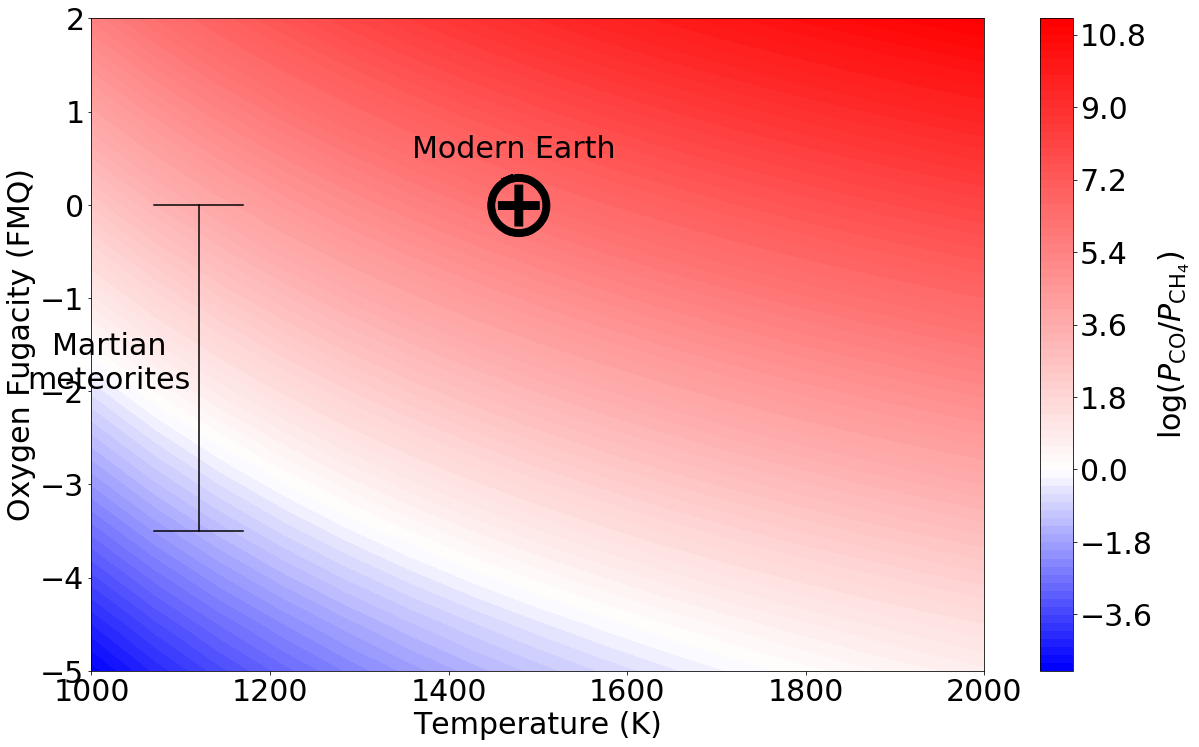

In [4]:
# plot
plt.rcParams.update({'font.size': 30})
divnorm = colors.DivergingNorm(vmin=np.min(np.log10(CO_CH4.T)), vcenter=0., vmax=np.max(np.log10(CO_CH4.T)))

fig,ax = plt.subplots(1,1,figsize = [20,12])
cs = ax.contourf(T,FMQ, np.log10(CO_CH4.T), 100,cmap ='bwr',norm=divnorm)
cbar = plt.colorbar(cs,ax=ax)  # draw colorbar
cbar.set_label(r"$\log(P_{\mathrm{CO}}/P_{\mathrm{CH_4}})$")

ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1])
ax.set_xlim(ax.get_xlim()[0],ax.get_xlim()[1])

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Oxygen Fugacity (FMQ)')

shft = 520
ax.plot([600+shft,600+shft],[-3.5,0],clip_on=False,color='k')
ax.plot([550+shft,650+shft],[-3.5,-3.5],clip_on=False,color='k')
ax.plot([550+shft,650+shft],[0,0],clip_on=False,color='k')
ax.text(850+shft-350,-1.7,"Martian\nmeteorites",verticalalignment='center',horizontalalignment='center',color='k')

#ax.arrow(750+shft,0,-200,0,head_width=.2,head_length=40,fc='k',color='k')
#ax.text(1100+10+shft,0,"Modern Earth upper\nmantle average",verticalalignment='center',horizontalalignment='center',color='k')
ax.scatter(1473,0,marker=r'$\oplus$',s=5000, c='k',zorder=10)
ax.text(1473,0+.5,"Modern Earth",horizontalalignment='center',color='k')

#plt.savefig("test1.pdf",bbox_inches='tight')

plt.show()

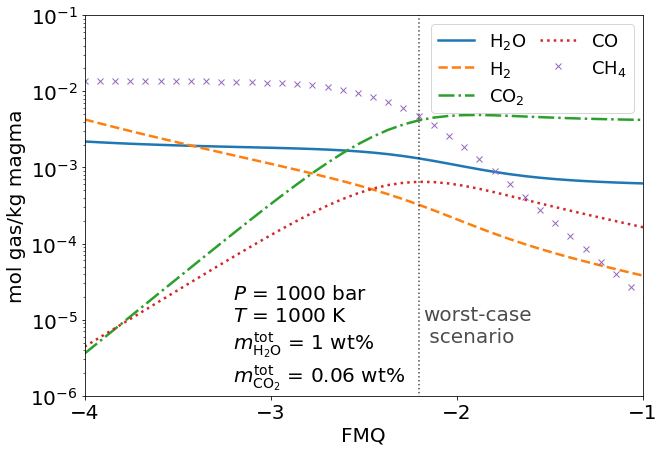

In [32]:
plt.rcParams.update({'font.size': 30})
mCO2tot=600e-6
mH2Otot=10000e-6

# set total pressure and temperature
n = 50
T = 1000 # kelvin
P = 1000 # bar
FMQ = np.linspace(-4,0,n)

H2O = []
H2 = []
CO2 = []
CO = []
CH4 = []
ff_O2 = []
for i in range(0,n):
    TT = T
    # set the Oxygen fugacity to FMQ
    A = 25738
    B = 9
    C = 0.092
    log_FMQ = (-A/TT+B+C*(P-1)/TT)
    f_O2 = 10**(log_FMQ+FMQ[i])
    # set to FMQ
    
    ff_O2.append(f_O2)


    P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(TT,P,f_O2,mCO2tot,mH2Otot)
    x = 0.01550152865954013
    H2O.append(1000*alphaG*x*(1/(1-alphaG))*P_H2O/P)
    H2.append(1000*alphaG*x*(1/(1-alphaG))*P_H2/P)
    CO2.append(1000*alphaG*x*(1/(1-alphaG))*P_CO2/P)
    CO.append(1000*alphaG*x*(1/(1-alphaG))*P_CO/P)
    CH4.append(1000*alphaG*x*(1/(1-alphaG))*P_CH4/P)

    
    
plt.rcParams.update({'font.size': 20})
fig,ax = plt.subplots(1,1,figsize = [10,7])

ax.plot(FMQ,H2O,'-',label='$\mathrm{H_2O}$',linewidth=2.5)
ax.plot(FMQ,H2,'--',label='$\mathrm{H_2}$',linewidth=2.5)
ax.plot(FMQ,CO2,'-.',label='$\mathrm{CO_2}$',linewidth=2.5)
ax.plot(FMQ,CO,':',label='$\mathrm{CO}$',linewidth=2.5)
ax.plot(FMQ,CH4,'x',label='$\mathrm{CH_4}$',linewidth=2.5)

ax.set_yscale('log')
ax.set_xlim(min(FMQ),-1)
ax.set_ylim(1e-6,1e-1)
#ax.set_yticks(np.arange(-3,1,1))
ax.set_xticks(np.arange(-4,0,1))

ax.set_xlabel('FMQ')
ax.set_ylabel('mol gas/kg magma')

ax.text(-3.2,1.5e-6,'$P$ = 1000 bar\n$T$ = 1000 K\n$m_{\mathrm{H_2O}}^{\mathrm{tot}}$ = 1 wt%\n$m_{\mathrm{CO_2}}^{\mathrm{tot}}$ = 0.06 wt%')

ax.plot([-2.2,-2.2],[1e-10,100],'k:',alpha=.7)
ax.text(-2.18,5e-6,'worst-case\n scenario',alpha=.7)
#ax.grid(ls='--')

ax.legend(ncol=2,columnspacing=.8,labelspacing=.4,loc=1,fontsize=18)

#plt.savefig("worst_case2.pdf",bbox_inches='tight')

plt.show()

In [48]:
# Estimate volcanism on Earth from
# MORB and continental volcanism

#### magma production rates ####
ridge = 21*3000*1e9 # kg/yr all from Crisp 1984
cont_low = 3*3000*1e9 
cont_high = 15*3000*1e9 
cont_mid = np.mean([cont_low,cont_high])
tot = 30*3000*1e9

##### Worst Case #####
mCO2tot=600e-6
mH2Otot=10000e-6
# set total pressure and temperature
TT = 1000 # kelvin
P = 1000 # bar
FMQ = -2.18
A = 25738
B = 9
C = 0.092
log_FMQ = (-A/TT+B+C*(P-1)/TT)
f_O2 = 10**(log_FMQ+FMQ)
P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(TT,P,f_O2,mCO2tot,mH2Otot)
H2O = (1000*alphaG*x*(1/(1-alphaG))*P_H2O/P)
H2 = (1000*alphaG*x*(1/(1-alphaG))*P_H2/P)
CO2 = (1000*alphaG*x*(1/(1-alphaG))*P_CO2/P)
CO = (1000*alphaG*x*(1/(1-alphaG))*P_CO/P)
CH4 = (1000*alphaG*x*(1/(1-alphaG))*P_CH4/P)

# flux in Tmol/yr
F_H2O = tot*H2O/1e12
F_H2 = tot*H2/1e12
F_CO2 = tot*float('%.1g' % CO2)/1e12
F_CO = tot*float('%.1g' % CO)/1e12
F_CH4 = tot*float('%.1g' % CH4)/1e12

print('---Submarine Volcanism---')
print('Calculated CH4 flux =','%.3f'%F_CH4)
print('Calculated CO2 flux =','%.3f'%F_CO2)
print('Calculated CO flux =','%.3f'%F_CO)




---Submarine Volcanism---
Calculated CH4 flux = 0.360
Calculated CO2 flux = 0.360
Calculated CO flux = 0.054


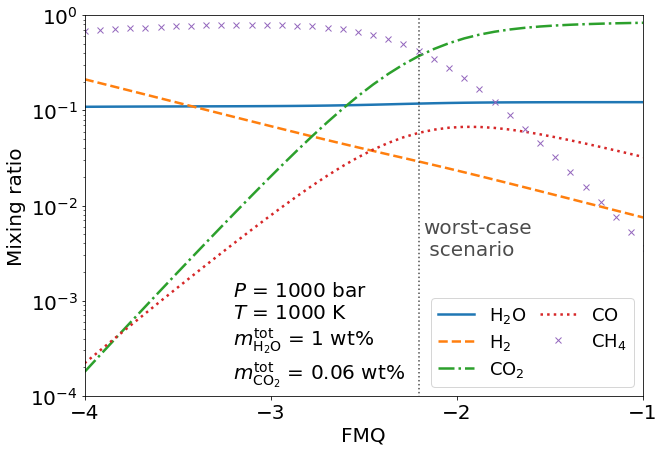

In [30]:
mCO2tot=600e-6
mH2Otot=10000e-6

# set total pressure and temperature
n = 50
T = 1000 # kelvin
P = 1000 # bar
FMQ = np.linspace(-4,0,n)

H2O = []
H2 = []
CO2 = []
CO = []
CH4 = []
ff_O2 = []
for i in range(0,n):
    TT = T
    # set the Oxygen fugacity to FMQ
    A = 25738
    B = 9
    C = 0.092
    log_FMQ = (-A/TT+B+C*(P-1)/TT)
    f_O2 = 10**(log_FMQ+FMQ[i])
    # set to FMQ
    
    ff_O2.append(f_O2)


    P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(TT,P,f_O2,mCO2tot,mH2Otot)
    x = 0.01550152865954013
    H2O.append(P_H2O/P)
    H2.append(P_H2/P)
    CO2.append(P_CO2/P)
    CO.append(P_CO/P)
    CH4.append(P_CH4/P)

    
    
plt.rcParams.update({'font.size': 20})
fig,ax = plt.subplots(1,1,figsize = [10,7])

ax.plot(FMQ,H2O,'-',label='$\mathrm{H_2O}$',linewidth=2.5)
ax.plot(FMQ,H2,'--',label='$\mathrm{H_2}$',linewidth=2.5)
ax.plot(FMQ,CO2,'-.',label='$\mathrm{CO_2}$',linewidth=2.5)
ax.plot(FMQ,CO,':',label='$\mathrm{CO}$',linewidth=2.5)
ax.plot(FMQ,CH4,'x',label='$\mathrm{CH_4}$',linewidth=2.5)

ax.set_yscale('log')
ax.set_xlim(min(FMQ),-1)
ax.set_ylim(1e-4,1)
#ax.set_yticks(np.arange(-3,1,1))
ax.set_xticks(np.arange(-4,0,1))

ax.set_xlabel('FMQ')
ax.set_ylabel('Mixing ratio')

ax.text(-3.2,1.5e-4,'$P$ = 1000 bar\n$T$ = 1000 K\n$m_{\mathrm{H_2O}}^{\mathrm{tot}}$ = 1 wt%\n$m_{\mathrm{CO_2}}^{\mathrm{tot}}$ = 0.06 wt%')

ax.plot([-2.2,-2.2],[1e-10,100],'k:',alpha=.7)
ax.text(-2.18,3e-3,'worst-case\n scenario',alpha=.7)
#ax.grid(ls='--')

ax.legend(ncol=2,columnspacing=.8,labelspacing=.4,loc=4,fontsize = 18)

#plt.savefig("worst_case1.pdf",bbox_inches='tight')

plt.show()

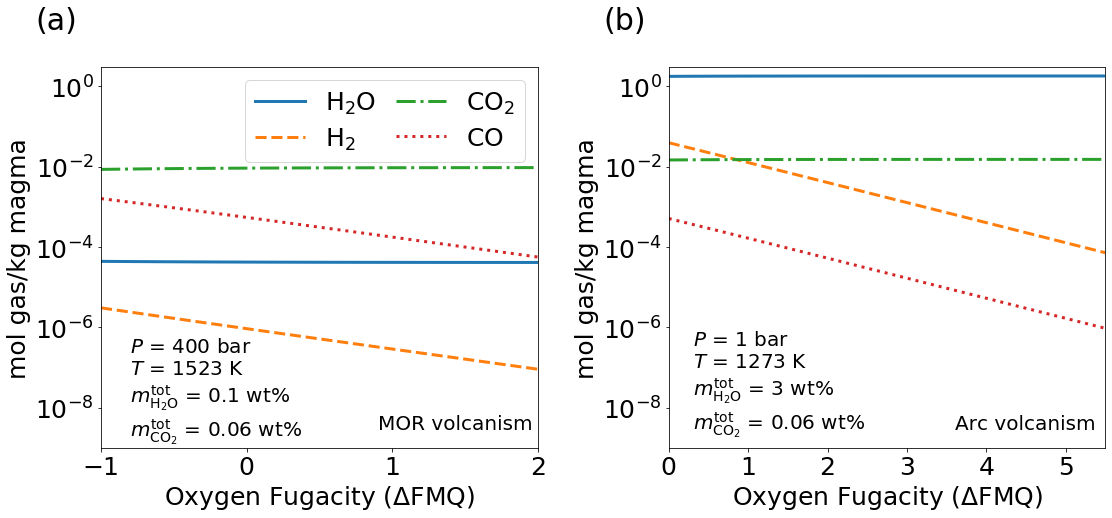

In [11]:
x = 0.01550152865954013
mCO2tot=600e-6
mH2Otot=1000e-6
# set total pressure and temperature
n = 50
T = 1523 # kelvin
P = 400 # bar
FMQ = np.linspace(-1,2,n)

H2O = []
H2 = []
CO2 = []
CO = []
CH4 = []
ff_O2 = []
for i in range(0,n):
    TT = T
    # set the Oxygen fugacity to FMQ
    A = 25738
    B = 9
    C = 0.092
    log_FMQ = (-A/TT+B+C*(P-1)/TT)
    f_O2 = 10**(log_FMQ+FMQ[i])
    # set to FMQ
    
    ff_O2.append(f_O2)


    P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(TT,P,f_O2,mCO2tot,mH2Otot)
    H2O.append(1000*alphaG*x*(1/(1-alphaG))*P_H2O/P)
    H2.append(1000*alphaG*x*(1/(1-alphaG))*P_H2/P)
    CO2.append(1000*alphaG*x*(1/(1-alphaG))*P_CO2/P)
    CO.append(1000*alphaG*x*(1/(1-alphaG))*P_CO/P)
    CH4.append(1000*alphaG*x*(1/(1-alphaG))*P_CH4/P)
    
lwdt = 3
plt.rcParams.update({'font.size': 25})
fig,[ax,ax1] = plt.subplots(1,2,figsize = [18,7])
ax.plot(FMQ,H2O,'-',label='$\mathrm{H_2O}$',linewidth=lwdt)
ax.plot(FMQ,H2,'--',label='$\mathrm{H_2}$',linewidth=lwdt)
ax.plot(FMQ,CO2,'-.',label='$\mathrm{CO_2}$',linewidth=lwdt)
ax.plot(FMQ,CO,':',label='$\mathrm{CO}$',linewidth=lwdt)
#ax.plot(FMQ,CH4,'x',label='$\mathrm{CH_4}$',linewidth=lwdt)
ax.set_yscale('log')
ax.set_xlim(min(FMQ),max(FMQ))
ax.set_ylim(1e-9,3)
ax.set_yticks(10**np.arange(-8.,1.,2))
ax.set_xticks(np.arange(-1,3,1))
ax.set_xlabel('Oxygen Fugacity ($\Delta$FMQ)')
ax.set_ylabel('mol gas/kg magma')
ax.legend(ncol=2,columnspacing=.8,labelspacing=.4,loc=0)
ax.text(-.8,2e-9,'$P$ = 400 bar\n$T$ = 1523 K\n$m_{\mathrm{H_2O}}^{\mathrm{tot}}$ = 0.1 wt%\n$m_{\mathrm{CO_2}}^{\mathrm{tot}}$ = 0.06 wt%',fontsize = 20)



mCO2tot=600e-6
mH2Otot=30000e-6
# set total pressure and temperature
n = 50
T = 1000+273 # kelvin
P = 1 # bar
FMQ = np.linspace(0,5.5,n)

H2O = []
H2 = []
CO2 = []
CO = []
CH4 = []
ff_O2 = []
for i in range(0,n):
    TT = T
    # set the Oxygen fugacity to FMQ
    A = 25738
    B = 9
    C = 0.092
    log_FMQ = (-A/TT+B+C*(P-1)/TT)
    f_O2 = 10**(log_FMQ+FMQ[i])
    # set to FMQ
    
    ff_O2.append(f_O2)


    P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(TT,P,f_O2,mCO2tot,mH2Otot)
    H2O.append(1000*alphaG*x*(1/(1-alphaG))*P_H2O/P)
    H2.append(1000*alphaG*x*(1/(1-alphaG))*P_H2/P)
    CO2.append(1000*alphaG*x*(1/(1-alphaG))*P_CO2/P)
    CO.append(1000*alphaG*x*(1/(1-alphaG))*P_CO/P)
    CH4.append(1000*alphaG*x*(1/(1-alphaG))*P_CH4/P)




ax1.plot(FMQ,H2O,'-',label='$\mathrm{H_2O}$',linewidth=lwdt)
ax1.plot(FMQ,H2,'--',label='$\mathrm{H_2}$',linewidth=lwdt)
ax1.plot(FMQ,CO2,'-.',label='$\mathrm{CO_2}$',linewidth=lwdt)
ax1.plot(FMQ,CO,':',label='$\mathrm{CO}$',linewidth=lwdt)
#ax1.plot(FMQ,CH4,'x',label='$\mathrm{CH_4}$',linewidth=lwdt)
ax1.set_yscale('log')
ax1.set_xlim(min(FMQ),max(FMQ))
ax1.set_ylim(1e-9,3)
ax1.set_yticks(10**np.arange(-8.,1.,2))
ax1.set_xticks(np.arange(0,6,1))
ax1.set_xlabel('Oxygen Fugacity ($\Delta$FMQ)')
ax1.set_ylabel('mol gas/kg magma')
#ax1.legend(ncol=2,columnspacing=.8,labelspacing=.4,loc=4)
ax1.text(.3,3e-9,'$P$ = 1 bar\n$T$ = 1273 K\n$m_{\mathrm{H_2O}}^{\mathrm{tot}}$ = 3 wt%\n$m_{\mathrm{CO_2}}^{\mathrm{tot}}$ = 0.06 wt%',fontsize = 20)
ax1.text(3.6,3e-9,'Arc volcanism',horizontalalignment='left',fontsize = 20)
ax.text(.9,3e-9,'MOR volcanism',horizontalalignment='left',fontsize = 20)


plt.subplots_adjust(wspace=.3)

ax.text(-0.15, 1.10, '(a)', transform=ax.transAxes,size=30)
ax1.text(-0.15, 1.10, '(b)', transform=ax1.transAxes,size=30)
#plt.savefig("test1.pdf",bbox_inches='tight')

plt.show()

In [69]:
# Estimate volcanism on Earth from
# MORB and continental volcanism

#### magma production rates ####
ridge = 21*3000*1e9 # kg/yr all from Crisp 1984
cont_low = 3*3000*1e9 
cont_high = 15*3000*1e9 
cont_mid = np.mean([cont_low,cont_high])

##### MORB #####
mCO2tot=600e-6
mH2Otot=1000e-6
# set total pressure and temperature
TT = 1523 # kelvin
P = 400 # bar
FMQ = 0
A = 25738
B = 9
C = 0.092
log_FMQ = (-A/TT+B+C*(P-1)/TT)
f_O2 = 10**(log_FMQ+FMQ)
P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(TT,P,f_O2,mCO2tot,mH2Otot)
H2O = (1000*alphaG*x*(1/(1-alphaG))*P_H2O/P)
H2 = (1000*alphaG*x*(1/(1-alphaG))*P_H2/P)
CO2 = (1000*alphaG*x*(1/(1-alphaG))*P_CO2/P)
CO = (1000*alphaG*x*(1/(1-alphaG))*P_CO/P)
CH4 = (1000*alphaG*x*(1/(1-alphaG))*P_CH4/P)

# flux in Tmol/yr
F_H2O = ridge*H2O/1e12
F_H2 = ridge*H2/1e12
F_CO2 = ridge*CO2/1e12
F_CO = ridge*CO/1e12
F_CH4 = ridge*CH4/1e12

print('---Submarine Volcanism---')
print('Calculated H2O flux =','%.3f'%F_H2O)
print('Calculated CO2 flux =','%.3f'%F_CO2)
print()
print('Catling+Kasting H2O flux =','?')
print('Catling+Kasting CO2 flux =','2 +/- 1')
print()

##### Cont #####
mCO2tot=600e-6
mH2Otot=30000e-6
# set total pressure and temperature
TT = 1273 # kelvin
P = 1 # bar
FMQ = 0
A = 25738
B = 9
C = 0.092
log_FMQ = (-A/TT+B+C*(P-1)/TT)
f_O2 = 10**(log_FMQ+FMQ)
P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(TT,P,f_O2,mCO2tot,mH2Otot)
H2O = (1000*alphaG*x*(1/(1-alphaG))*P_H2O/P)
H2 = (1000*alphaG*x*(1/(1-alphaG))*P_H2/P)
CO2 = (1000*alphaG*x*(1/(1-alphaG))*P_CO2/P)
CO = (1000*alphaG*x*(1/(1-alphaG))*P_CO/P)
CH4 = (1000*alphaG*x*(1/(1-alphaG))*P_CH4/P)

# flux in Tmol/yr
F_H2O = cont_high*H2O/1e12
F_H2 = cont_high*H2/1e12
F_CO2 = cont_high*CO2/1e12
F_CO = cont_high*CO/1e12
F_CH4 = cont_high*CH4/1e12

print('---Continental Volcanism---')
print('Calculated H2O flux =','%.3f'%F_H2O)
print('Calculated H2 flux =','%.3f'%F_H2)
print('Calculated CO2 flux =','%.3f'%F_CO2)
print('Calculated CO flux =','%.3f'%F_CO)
print()
print('Catling+Kasting H2O flux =','80 +/- 20')
print('Catling+Kasting H2 flux =','1')
print('Catling+Kasting CO2 flux =','2.4 +/- 0.7')
print('Catling+Kasting CO flux =','0.1')

---Submarine Volcanism---
Calculated H2O flux = 0.003
Calculated CO2 flux = 0.581

Catling+Kasting H2O flux = ?
Catling+Kasting CO2 flux = 2 +/- 1

---Continental Volcanism---
Calculated H2O flux = 80.201
Calculated H2 flux = 1.783
Calculated CO2 flux = 0.663
Calculated CO flux = 0.023

Catling+Kasting H2O flux = 80 +/- 20
Catling+Kasting H2 flux = 1
Catling+Kasting CO2 flux = 2.4 +/- 0.7
Catling+Kasting CO flux = 0.1


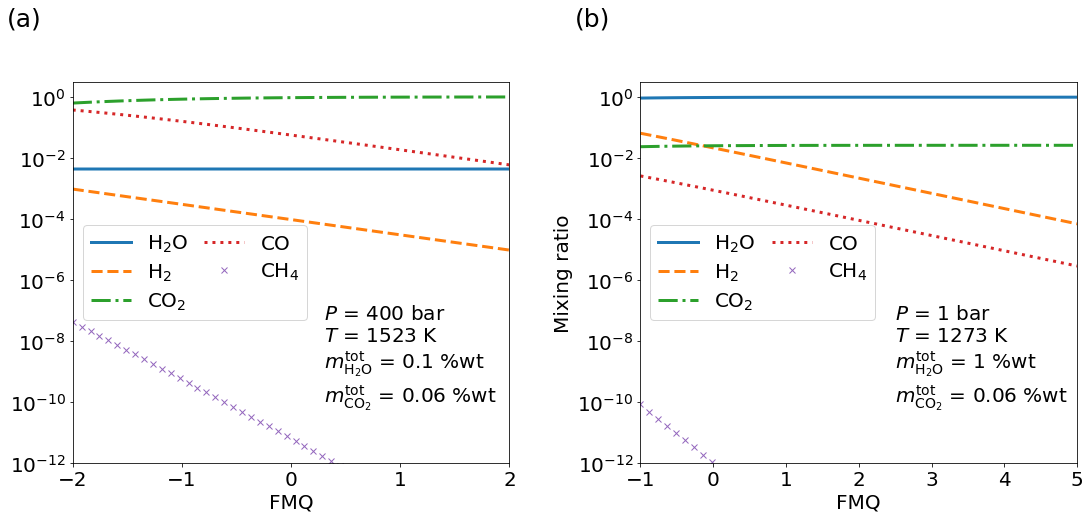

In [4]:
x = 0.01550152865954013
mCO2tot=600e-6
mH2Otot=1000e-6
# set total pressure and temperature
n = 50
T = 1523 # kelvin
P = 400 # bar
FMQ = np.linspace(-2,2,n)

H2O = []
H2 = []
CO2 = []
CO = []
CH4 = []
ff_O2 = []
for i in range(0,n):
    TT = T
    # set the Oxygen fugacity to FMQ
    A = 25738
    B = 9
    C = 0.092
    log_FMQ = (-A/TT+B+C*(P-1)/TT)
    f_O2 = 10**(log_FMQ+FMQ[i])
    # set to FMQ
    
    ff_O2.append(f_O2)


    P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(TT,P,f_O2,mCO2tot,mH2Otot)
    H2O.append(P_H2O/P)
    H2.append(P_H2/P)
    CO2.append(P_CO2/P)
    CO.append(P_CO/P)
    CH4.append(P_CH4/P)
    
lwdt = 3
plt.rcParams.update({'font.size': 20})
fig,[ax,ax1] = plt.subplots(1,2,figsize = [18,7])
ax.plot(FMQ,H2O,'-',label='$\mathrm{H_2O}$',linewidth=lwdt)
ax.plot(FMQ,H2,'--',label='$\mathrm{H_2}$',linewidth=lwdt)
ax.plot(FMQ,CO2,'-.',label='$\mathrm{CO_2}$',linewidth=lwdt)
ax.plot(FMQ,CO,':',label='$\mathrm{CO}$',linewidth=lwdt)
ax.plot(FMQ,CH4,'x',label='$\mathrm{CH_4}$',linewidth=lwdt)
ax.set_yscale('log')
ax.set_xlim(min(FMQ),max(FMQ))
ax.set_ylim(1e-12,3)
#ax.set_yticks(np.arange(-3,1,1))
ax.set_xticks(np.arange(-2,3,1))
ax.set_xlabel('FMQ')
ax1.set_ylabel('Mixing ratio')
ax.legend(ncol=2,columnspacing=.8,labelspacing=.4,loc=6)
ax.text(.3,1e-10,'$P$ = 400 bar\n$T$ = 1523 K\n$m_{\mathrm{H_2O}}^{\mathrm{tot}}$ = 0.1 %wt\n$m_{\mathrm{CO_2}}^{\mathrm{tot}}$ = 0.06 %wt')



mCO2tot=600e-6
mH2Otot=10000e-6
# set total pressure and temperature
n = 50
T = 1000+273 # kelvin
P = 1 # bar
FMQ = np.linspace(-1,5,n)

H2O = []
H2 = []
CO2 = []
CO = []
CH4 = []
ff_O2 = []
for i in range(0,n):
    TT = T
    # set the Oxygen fugacity to FMQ
    A = 25738
    B = 9
    C = 0.092
    log_FMQ = (-A/TT+B+C*(P-1)/TT)
    f_O2 = 10**(log_FMQ+FMQ[i])
    # set to FMQ
    
    ff_O2.append(f_O2)


    P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(TT,P,f_O2,mCO2tot,mH2Otot)
    H2O.append(P_H2O/P)
    H2.append(P_H2/P)
    CO2.append(P_CO2/P)
    CO.append(P_CO/P)
    CH4.append(P_CH4/P)




ax1.plot(FMQ,H2O,'-',label='$\mathrm{H_2O}$',linewidth=lwdt)
ax1.plot(FMQ,H2,'--',label='$\mathrm{H_2}$',linewidth=lwdt)
ax1.plot(FMQ,CO2,'-.',label='$\mathrm{CO_2}$',linewidth=lwdt)
ax1.plot(FMQ,CO,':',label='$\mathrm{CO}$',linewidth=lwdt)
ax1.plot(FMQ,CH4,'x',label='$\mathrm{CH_4}$',linewidth=lwdt)
ax1.set_yscale('log')
ax1.set_xlim(min(FMQ),max(FMQ))
ax1.set_ylim(1e-12,3)
#ax1.set_yticks(np.arange(-3,1,1))
ax1.set_xticks(np.arange(-1,6,1))
ax1.set_xlabel('FMQ')
ax1.set_ylabel('Mixing ratio')
ax1.legend(ncol=2,columnspacing=.8,labelspacing=.4,loc=6)
ax1.text(2.5,1e-10,'$P$ = 1 bar\n$T$ = 1273 K\n$m_{\mathrm{H_2O}}^{\mathrm{tot}}$ = 1 %wt\n$m_{\mathrm{CO_2}}^{\mathrm{tot}}$ = 0.06 %wt')

plt.subplots_adjust(wspace=.3)

ax.text(-0.15, 1.15, '(a)', transform=ax.transAxes,size=25)
ax1.text(-0.15, 1.15, '(b)', transform=ax1.transAxes,size=25)
#plt.savefig("Earth_approx.pdf",bbox_inches='tight')

plt.show()